In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

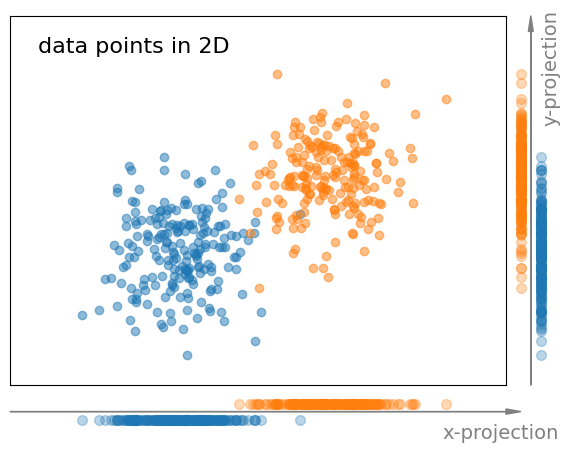

In [2]:
np.random.seed(122)
Npoints = 200
x = np.random.normal(loc=0.0, scale=0.7, size = (2,Npoints))
y = np.random.normal(loc=0.0, scale=0.7, size = (2,Npoints))
y[0] += 3
y[1] += 1.5
fig,ax = plt.subplots()
ax.plot(*x, 'o', alpha=0.5)
ax.plot(*y, 'o', alpha=0.5)
ax.set_ylim(-2.5,4.5)
ax.set_xlim(-3.5,6.5)
ax.set_xticks([])
ax.set_yticks([])
ax.text(-1, 3.8, 'data points in 2D', fontsize=16, ha='center')
yvertproj = -3
ax.arrow(-3.5, yvertproj,   # starting point (x,y)
         10, 0,   # direction vector (dx, dy)
         head_width=0.1, head_length=0.3,
         fc='gray', ec='gray', clip_on=False)
t = np.zeros(Npoints) +yvertproj
ax.plot(x[0], t-0.15, 'o', color='C0', alpha=0.3, markersize=7, clip_on=False)
ax.plot(y[0], t+0.15, 'o', color='C1', alpha=0.3, markersize=7, clip_on=False)
ax.text(6.4, yvertproj-0.5, 'x-projection', color='gray', fontsize=14, ha='center')

xhorproj = 7
ax.arrow(xhorproj,-2.5,   # starting point (x,y)
         0, 6.7,   # direction vector (dx, dy)
         head_width=0.1, head_length=0.3,
         fc='gray', ec='gray', clip_on=False)
t = np.zeros(Npoints) +xhorproj
ax.plot(t+0.2, x[1], 'o', color='C0', alpha=0.3, markersize=7, clip_on=False)
ax.plot(t-0.2, y[1], 'o', color='C1', alpha=0.3, markersize=7, clip_on=False)
ax.text(xhorproj+0.4, 2.5, 'y-projection', color='gray', fontsize=14, ha='center', rotation=90)
fig.savefig('Pics/2D_data_projection.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [3]:
#Data generation
def generate_data(Ndata, seed, offset_A, offset_B=(0,0)):
    np.random.seed(seed)
    width = 0.4
    x_A = np.random.normal(offset_A[0], width, size=(Ndata,))
    y_A = np.random.normal(offset_A[1], width, size=(Ndata,))
    data_A = np.array([x_A,y_A]).T

    x_B = np.random.normal(offset_B[0], width, size=(Ndata,))
    y_B = np.random.normal(offset_B[1], width, size=(Ndata,))
    data_B = np.array([x_B,y_B]).T

    return np.concatenate((data_A, data_B)), np.concatenate((np.zeros(Ndata), np.ones(Ndata)))

In [4]:
# 3. Show decision regions
def show_result(model, X, y):
    pad = 0.2
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                        np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor="k", alpha=0.6)
    return fig,ax




In [5]:
#4. Confusion matrix
def show_cm(model, X,y):
    # Make predictions on the test data
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    
    # assume cm is defined (your confusion matrix)
    fig, ax = plt.subplots(figsize=(5, 4))

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=[0, 1, 2],
        yticklabels=[0, 1, 2],
        ax=ax
    )

    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title("Confusion Matrix")
    return fig,ax


In [6]:
# 1. generate data
X,y = generate_data(100, 123, (1,1))
# Generate test data
X_test, y_test = generate_data(100, 125, (1,1))

In [7]:
# 2. Fit a decision tree
clf = DecisionTreeClassifier()
clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


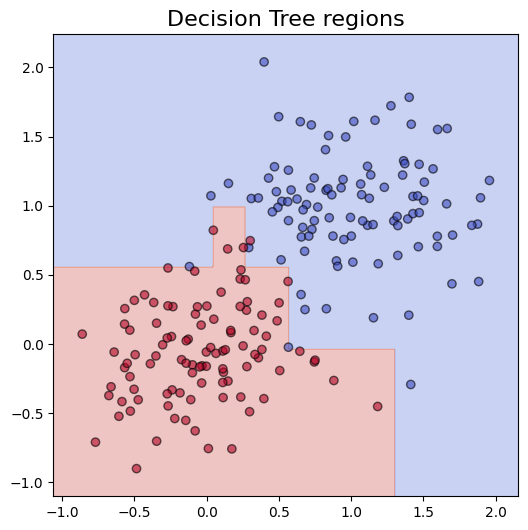

In [8]:
fig, ax = show_result(clf,X,y)
ax.set_title("Decision Tree regions", fontsize=16)
fig.savefig('Pics/decision_tree_regions.pdf', transparent=True)
plt.show()

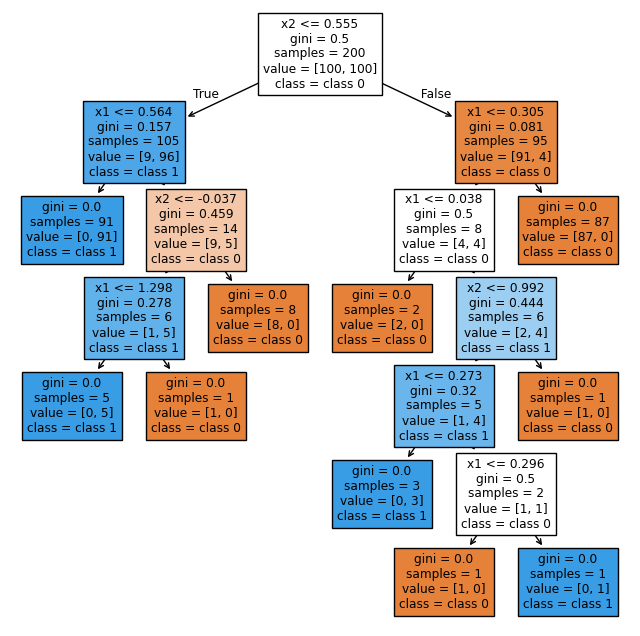

In [9]:
# 🌙 4. Show the tree structure
plt.figure(figsize=(8, 8))
plot_tree(clf, feature_names=["x1", "x2"], class_names=["class 0", "class 1"], filled=True)
plt.savefig('Pics/decision_tree_structure.pdf', transparent=True )
plt.show()

In [10]:
#TRaining accuracy:
y_pred = clf.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)

[[100   0]
 [  0 100]]


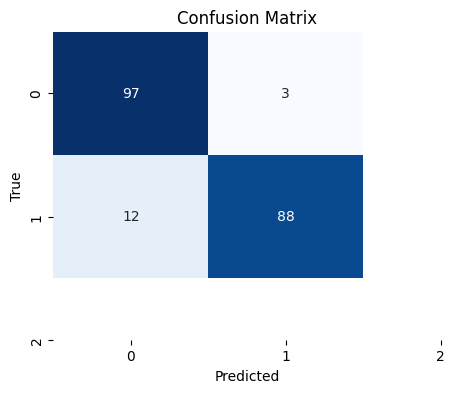

In [11]:
fig,ax= show_cm(clf, X_test, y_test)
fig.savefig("Pics/confusion_matrix.pdf", transparent=True)
plt.show()


In [12]:
# Train Random Forest
clf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # let trees grow fully
    random_state=42
)
clf.fit(X, y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


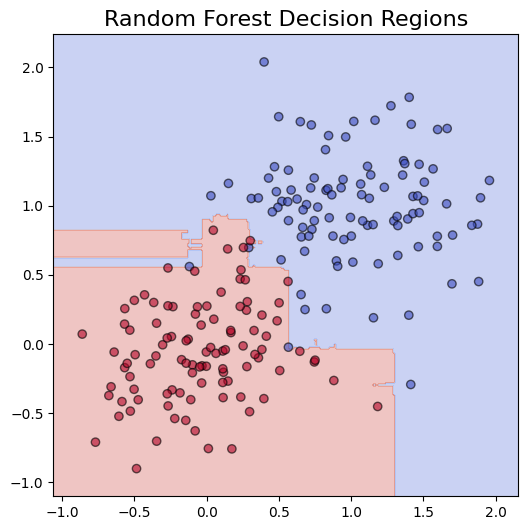

In [13]:
fig, ax = show_result(clf,X,y)
ax.set_title("Random Forest Decision Regions", fontsize=16)
fig.savefig('Pics/random_forest_regions.pdf', transparent=True)
plt.show()

In [14]:
#Training accuracy:
y_pred = clf.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)

[[100   0]
 [  0 100]]


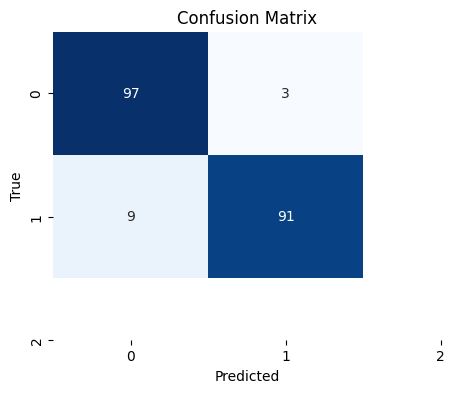

In [15]:
fig,ax= show_cm(clf, X_test, y_test)
plt.show()

In [16]:

# Bagging with decision trees
base_tree = DecisionTreeClassifier(max_depth=None, random_state=42)
clf = BaggingClassifier(
    estimator=base_tree,
    n_estimators=50,          # number of trees
    max_samples=0.8,          # each tree sees 80% of data
    bootstrap=True,           # sampling with replacement
    random_state=42
)

clf.fit(X,y)


,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,50
,max_samples,0.8
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


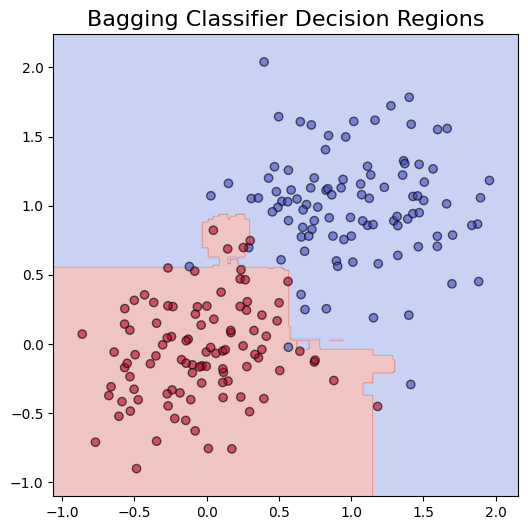

In [17]:
fig, ax = show_result(clf,X,y)
ax.set_title("Bagging Classifier Decision Regions", fontsize=16)
fig.savefig('Pics/bagging_classifier_regions.pdf', transparent=True)
plt.show()

In [18]:
#Training accuracy:
y_pred = clf.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)

[[99  1]
 [ 1 99]]


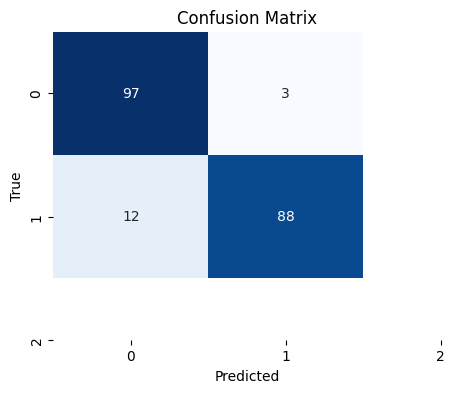

In [19]:
fig,ax= show_cm(clf, X_test, y_test)
plt.show()